<a href="https://colab.research.google.com/github/azzazhr/PCVK_Ganjil_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI-3B**

**MODUL 5 PCVK (TUGAS PRAKTIKUM)**

# **1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


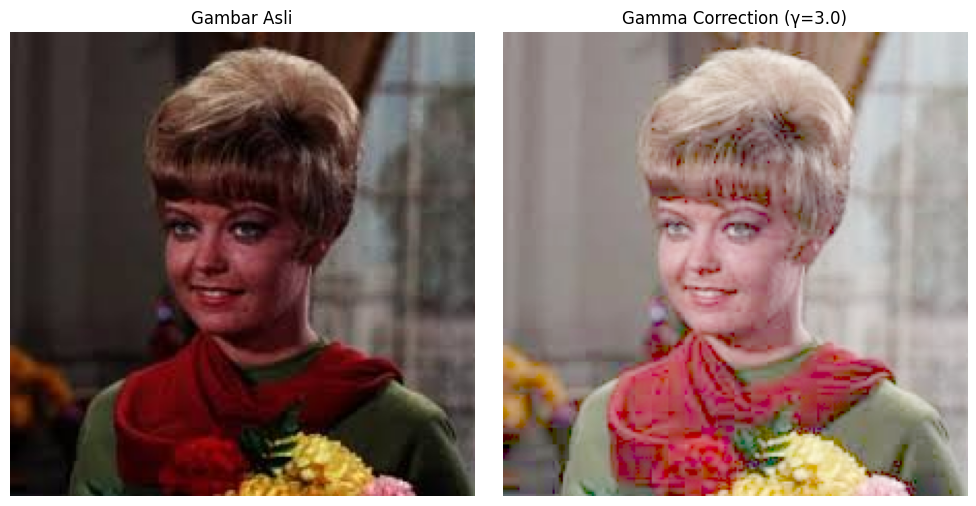

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive agar dapat membaca file dari Drive
drive.mount('/content/drive')

print(' Gamma Correction pada citra ')
print('----------------------------------')

# Input nilai gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:  # Jika input bukan angka
    print('Error, not a number')
    exit()

# Path lokasi gambar di Google Drive
img_path = '/content/drive/MyDrive/PCVK/Images/female.jpg'

# Membaca gambar menggunakan OpenCV
img = cv2.imread(img_path)
if img is None:  # Mengecek apakah gambar berhasil dibaca
    print("Gambar tidak ditemukan!")
    print("Pastikan path sudah benar:", img_path)
    exit()

# Normalisasi nilai piksel menjadi rentang [0, 1]
img_normalized = img / 255.0

# Melakukan Gamma Correction
gamma_corrected = np.power(img_normalized, 1.0 / gamma)

# Mengubah kembali ke rentang [0, 255] untuk ditampilkan
gamma_corrected = np.uint8(gamma_corrected * 255)

# Menampilkan gambar asli dan hasil gamma correction
plt.figure(figsize=(10, 5))  # Ukuran figure

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Mengubah dari BGR ke RGB
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan gambar hasil gamma correction
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (γ={gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()

# **2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

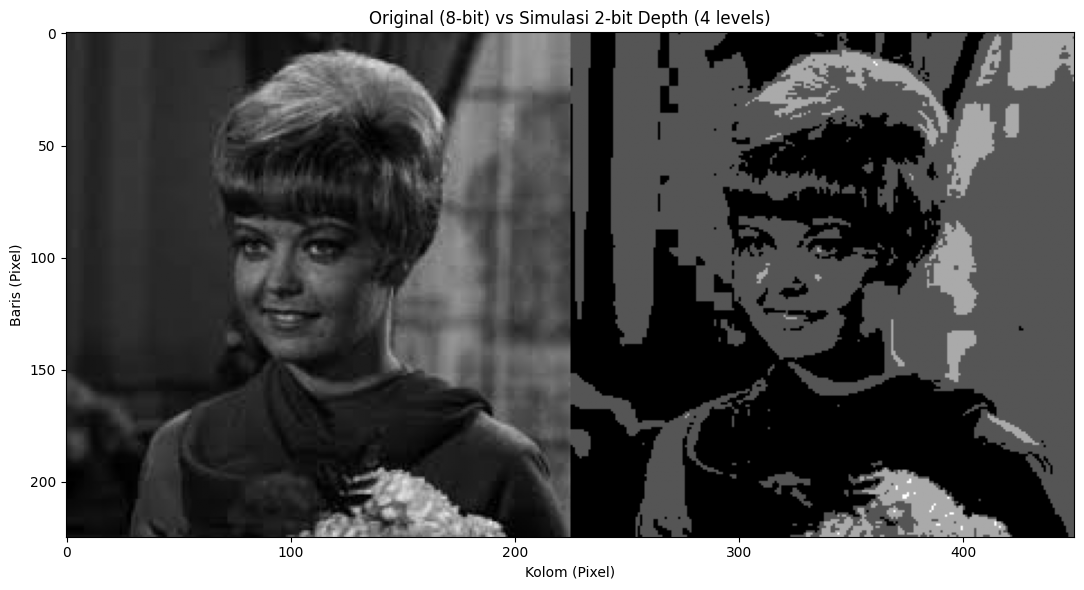

Dimensi gambar asli: (225, 225)
Dimensi gabungan: (225, 450)


In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Set bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Baca gambar grayscale
img_path = '/content/drive/MyDrive/PCVK/Images/female.jpg'
original = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

if original is not None:
    # Kuantisasi
    quantized = np.round(original / level) * level
    depth_image = quantized.astype(original.dtype)

    # Gabungkan gambar (horizontal stack → lebar 2x lipat)
    combined_image = np.hstack((original, depth_image))

    # Ambil dimensi
    rows, cols = combined_image.shape

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.imshow(combined_image, cmap='gray')
    plt.title(f'Original (8-bit) vs Simulasi {bit_depth}-bit Depth ({2**bit_depth} levels)')

    # Set ticks sesuai ukuran gambar
    plt.xlabel('Kolom (Pixel)')
    plt.ylabel('Baris (Pixel)')
    plt.xticks(np.arange(0, cols+1, 100))  # setiap 100 kolom
    plt.yticks(np.arange(0, rows+1, 50))   # setiap 50 baris

    plt.tight_layout()
    plt.show()

    # Info tambahan
    print(f"Dimensi gambar asli: {original.shape}")
    print(f"Dimensi gabungan: {combined_image.shape}")
else:
    print("Gambar tidak ditemukan!")

# **3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Memeriksa Kebutuhan Gambar Praktikum ===
Folder 'noises' tidak ditemukan. Membuat folder dan 100 gambar noise...
Selesai! 100 gambar noise berhasil dibuat.

=== Memulai Proses Average Denoising ===
Berhasil memuat 100 gambar noise dan 1 gambar asli.
Memproses gambar dan menghitung PSNR...
PSNR dengan 5 gambar: 37.49 dB
PSNR dengan 10 gambar: 39.39 dB
PSNR dengan 20 gambar: 40.78 dB
PSNR dengan 40 gambar: 41.69 dB
PSNR dengan 80 gambar: 42.23 dB
PSNR dengan 100 gambar: 42.34 dB


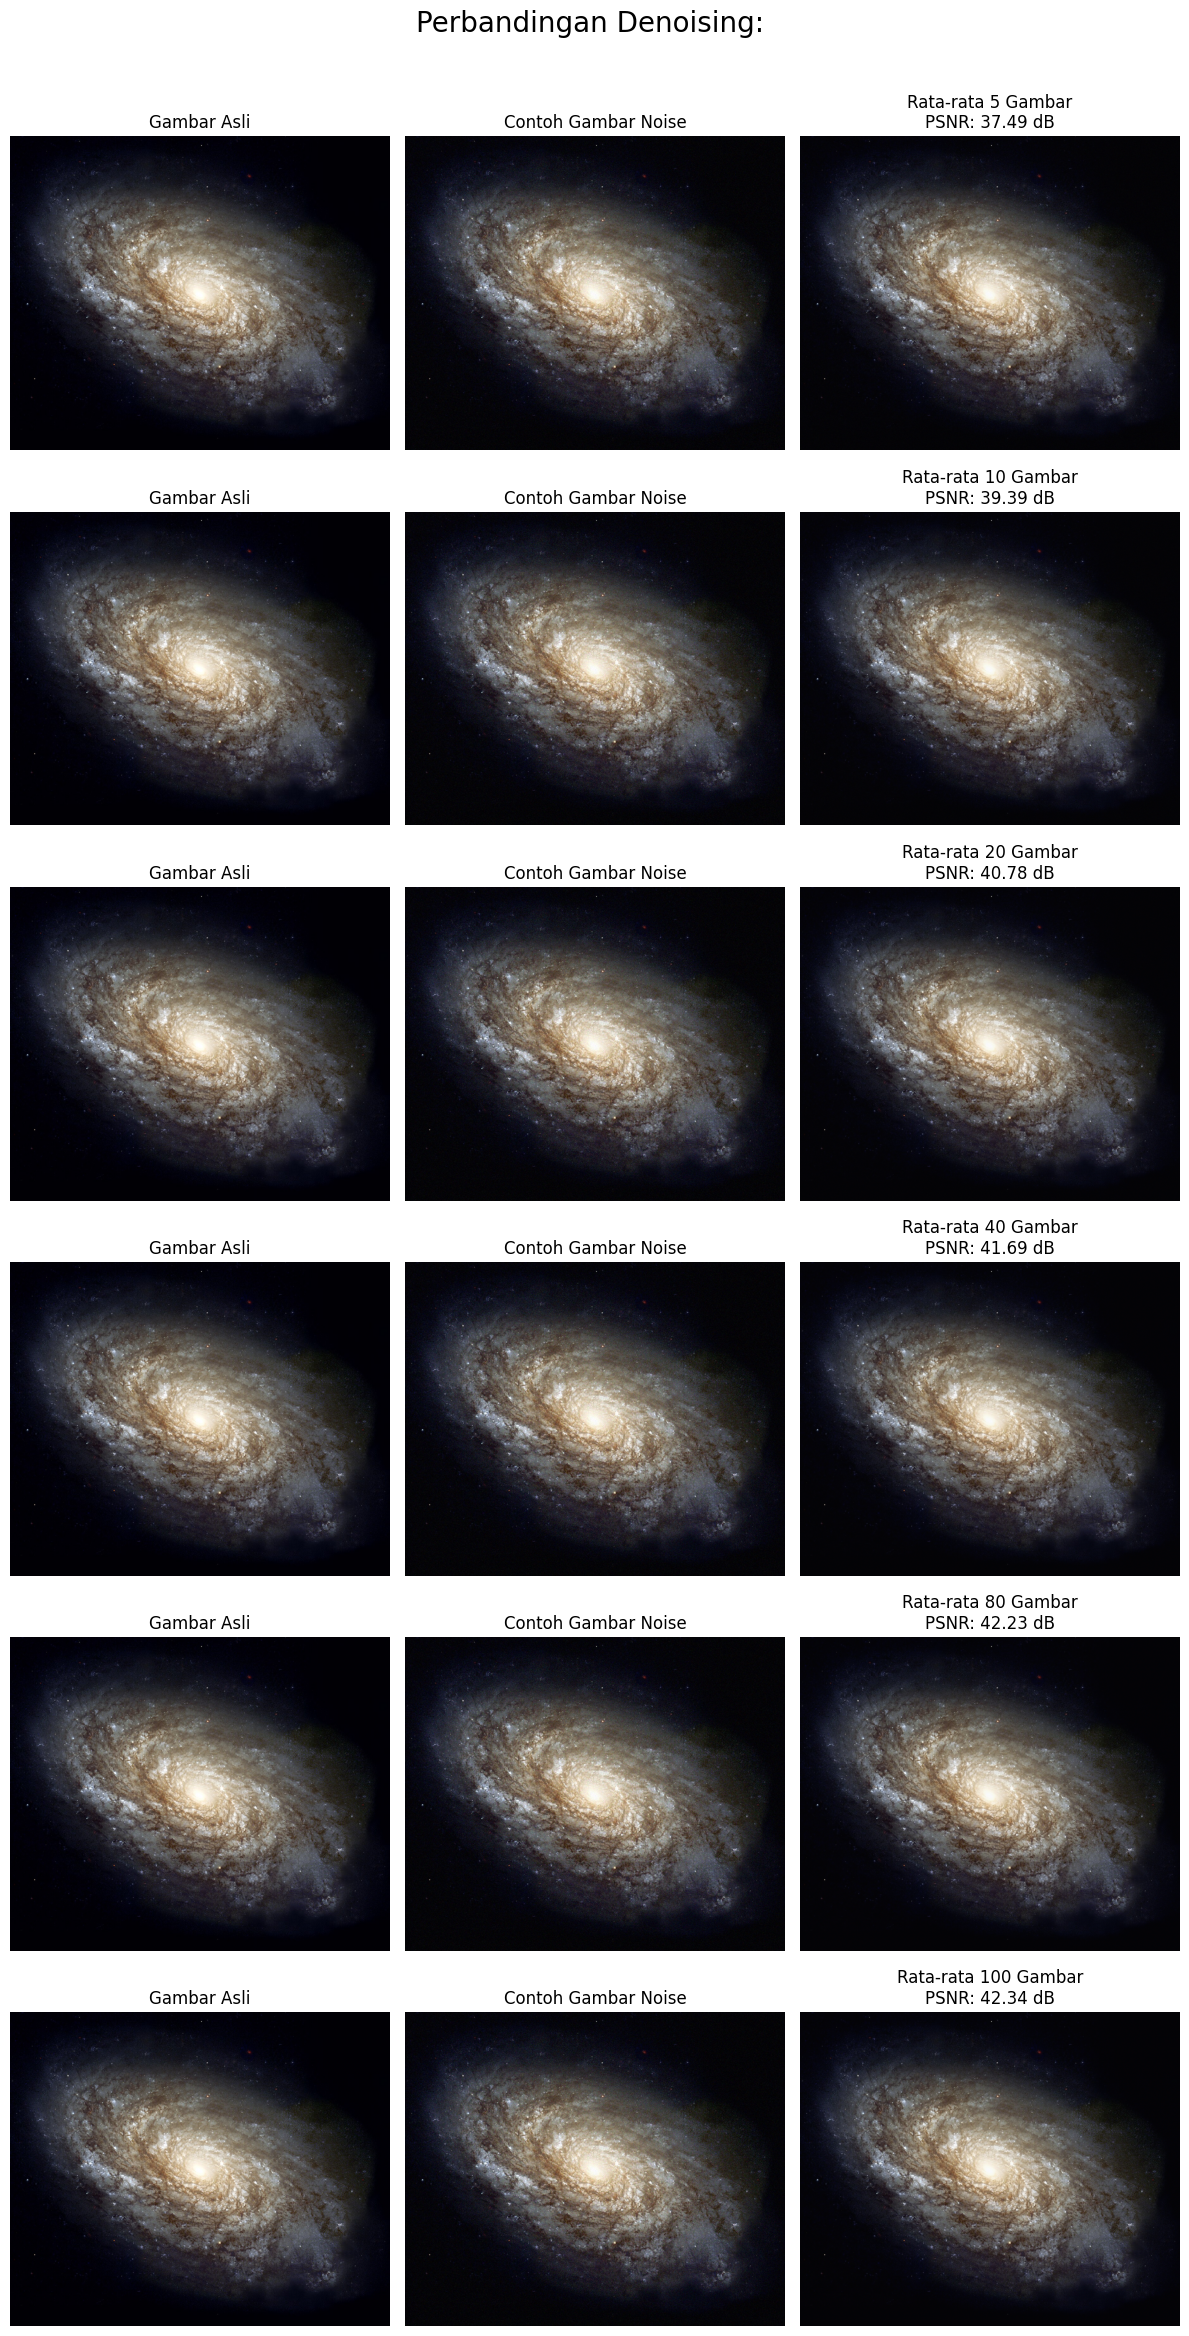

In [65]:
import cv2 as cv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from google.colab import drive

# PERSIAPAN AWAL
# Selalu mount drive untuk memastikan koneksi
drive.mount('/content/drive')

# Tentukan semua path yang dibutuhkan di awal
base_path = "/content/drive/MyDrive/PCVK/Images"
img_path_original = os.path.join(base_path, "galaxy.jpg")
noises_folder_path = os.path.join(base_path, "noises")

# BAGIAN 1: PEMBUATAN GAMBAR NOISE SECARA OTOMATIS

print("=== Memeriksa Kebutuhan Gambar Praktikum ===")

# Muat gambar asli terlebih dahulu untuk dijadikan dasar
original_img = cv.imread(img_path_original)

if original_img is None:
    print(f"!! ERROR: Gambar asli 'galaxy.jpg' tidak ditemukan di {base_path}")
    print("!! Pastikan file galaxy.jpg sudah ada sebelum melanjutkan.")
else:
    # Periksa apakah folder 'noises' sudah ada
    if not os.path.exists(noises_folder_path):
        print(f"Folder 'noises' tidak ditemukan. Membuat folder dan 100 gambar noise...")
        os.makedirs(noises_folder_path) # Buat folder

        # Proses pembuatan 100 gambar noise
        for i in range(100):
            noisy_image = original_img.copy()
            mean = 0
            var = 100
            sigma = var**0.5
            gaussian_noise = np.random.normal(mean, sigma, original_img.shape)
            noisy_image = cv.add(noisy_image.astype(np.float64), gaussian_noise)
            noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
            cv.imwrite(os.path.join(noises_folder_path, f"noise_{i+1:03d}.jpg"), noisy_image)

        print("Selesai! 100 gambar noise berhasil dibuat.")
    else:
        print("Folder 'noises' sudah ada. Proses pembuatan gambar dilewati.")

    # BAGIAN 2: PROSES AVERAGE DENOISING DAN PLOTTING

    print("\n=== Memulai Proses Average Denoising ===")

    # Muat semua gambar dari folder noises
    img_path_noise = os.path.join(noises_folder_path, "*.jpg")
    cv_img = [cv.imread(file) for file in glob.glob(img_path_noise)]

    if not cv_img:
        print("!! ERROR: Gagal memuat gambar dari folder 'noises' meskipun folder ada.")
    else:
        print(f"Berhasil memuat {len(cv_img)} gambar noise dan 1 gambar asli.")

        def PSNR(original, processed):
            mse = np.mean((original.astype(np.float64) - processed.astype(np.float64)) ** 2)
            if mse == 0: return 100
            max_pixel = 255.0
            return 20 * np.log10(max_pixel / np.sqrt(mse))

        jumlah_citra = [5, 10, 20, 40, 80, 100]
        hasil_gambar = {}

        print("Memproses gambar dan menghitung PSNR...")
        for n in jumlah_citra:
            imgs_to_average = cv_img[:n]
            sum_img = np.sum([img.astype(np.float64) for img in imgs_to_average], axis=0)
            avg_img = np.uint8(sum_img / n)
            hasil_gambar[n] = avg_img
            psnr_value = PSNR(original_img, avg_img)
            print(f"PSNR dengan {n} gambar: {psnr_value:.2f} dB")

        # Tampilkan plot perbandingan
        sample_noise_img = cv_img[0]
        fig, axes = plt.subplots(len(jumlah_citra), 3, figsize=(12, 24))
        fig.suptitle("Perbandingan Denoising: ", fontsize=20)

        for i, n in enumerate(jumlah_citra):
            img_hasil = hasil_gambar[n]
            psnr_val = PSNR(original_img, img_hasil)

            axes[i, 0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
            axes[i, 0].set_title(f"Gambar Asli")
            axes[i, 0].axis('off')

            axes[i, 1].imshow(cv.cvtColor(sample_noise_img, cv.COLOR_BGR2RGB))
            axes[i, 1].set_title(f"Contoh Gambar Noise")
            axes[i, 1].axis('off')

            axes[i, 2].imshow(cv.cvtColor(img_hasil, cv.COLOR_BGR2RGB))
            axes[i, 2].set_title(f"Rata-rata {n} Gambar\nPSNR: {psnr_val:.2f} dB")
            axes[i, 2].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

**KESIMPULAN**

Berdasarkan hasil yang ditampilkan, dapat disimpulkan bahwa metode average denoising terbukti sangat efektif untuk mengurangi noise pada citra. Hal ini terlihat jelas dari peningkatan nilai PSNR yang konsisten seiring dengan bertambahnya jumlah gambar yang dirata-ratakan, di mana nilainya naik secara signifikan dari 37.48 dB saat menggunakan 5 gambar menjadi 42.34 dB saat menggunakan 100 gambar. Kenaikan nilai PSNR ini secara langsung menunjukkan bahwa kualitas gambar hasil pemulihan menjadi semakin baik dan semakin mendekati kondisi gambar aslinya yang bersih. Selain itu, data juga menunjukkan adanya efek diminishing returns, di mana peningkatan kualitas paling besar terjadi pada tahap awal, dan penambahan gambar di tahap akhir memberikan peningkatan yang lebih kecil.

# **4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


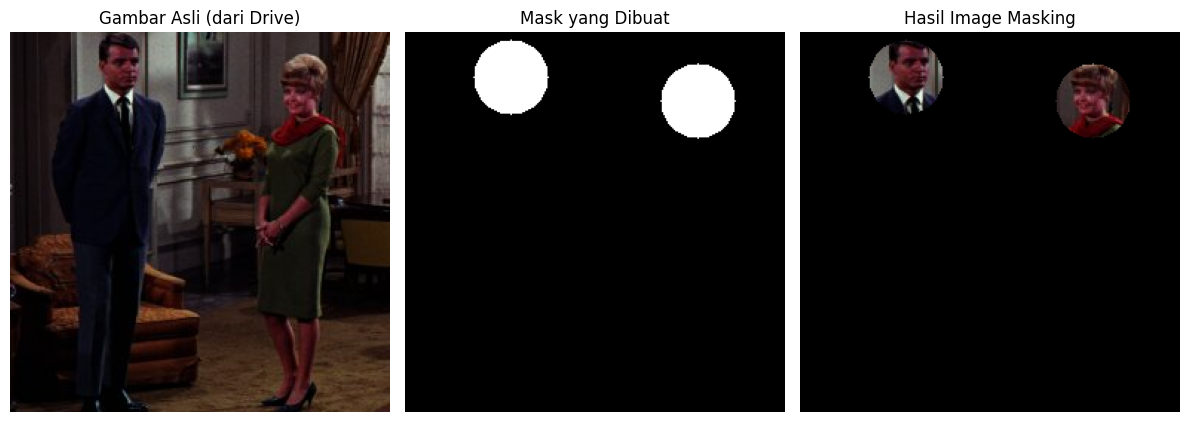

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

# Path ke gambar asli di dalam Drive
img_path = '/content/drive/MyDrive/PCVK/Images/couple.jpg'
img = cv.imread(img_path)

# Pengecekan untuk memastikan gambar berhasil dimuat
if img is None:
    print(f"ERROR: Gagal memuat gambar dari path: {img_path}")
    print("Pastikan path sudah benar!")
else:
    # Konversi warna ke RGB agar tampil benar di Matplotlib
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # LANGKAH 1: MEMBUAT MASK
    # Buat kanvas hitam seukuran gambar asli
    mask = np.zeros(img.shape[:2], dtype="uint8")
    height, width = img.shape[:2]

    # Tentukan posisi dan ukuran lingkaran
    center_kiri = (int(width * 0.28), int(height * 0.12))
    center_kanan = (int(width * 0.77), int(height * 0.18))
    radius = int(height * 0.10)

    # Gambar dua lingkaran putih pada kanvas hitam
    cv.circle(mask, center_kiri, radius, 255, -1)
    cv.circle(mask, center_kanan, radius, 255, -1)

    # LANGKAH 2: MENERAPKAN MASK
    # Gunakan operasi bitwise AND
    masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

    # LANGKAH 3: MENAMPILKAN HASIL
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Gambar Asli (dari Drive)')
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask yang Dibuat')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Hasil Image Masking')
    plt.imshow(masked_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# **5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Menampilkan hasil untuk setiap operator logika...


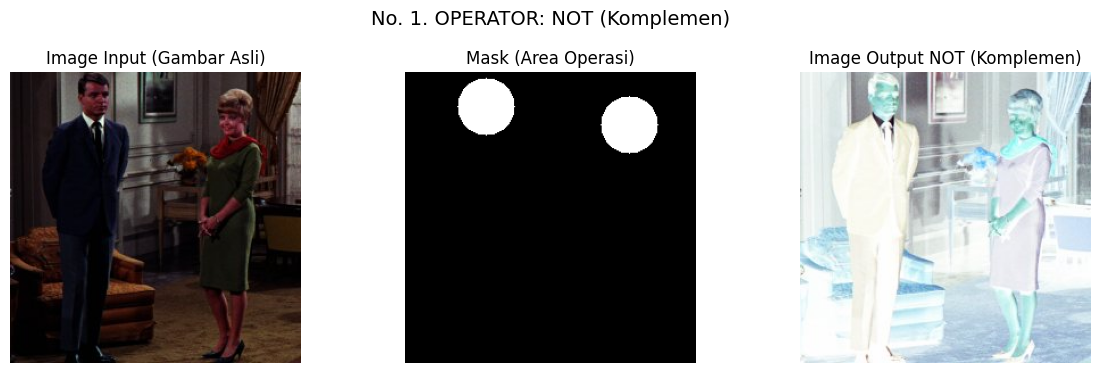

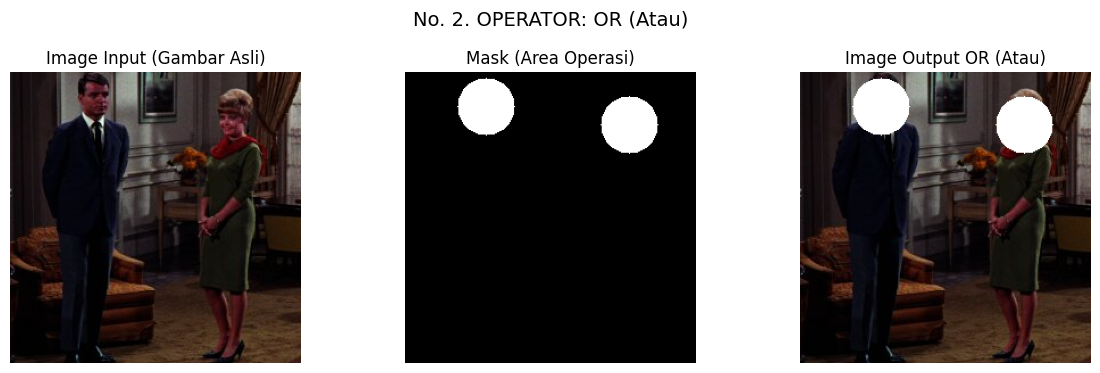

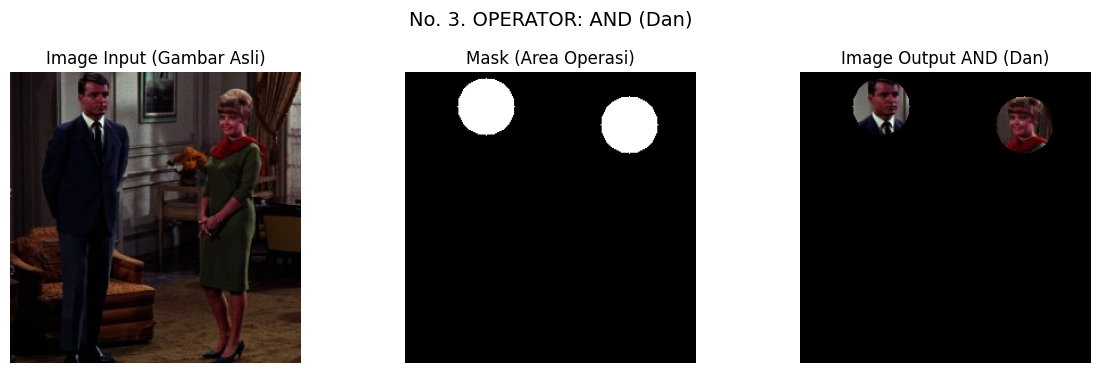

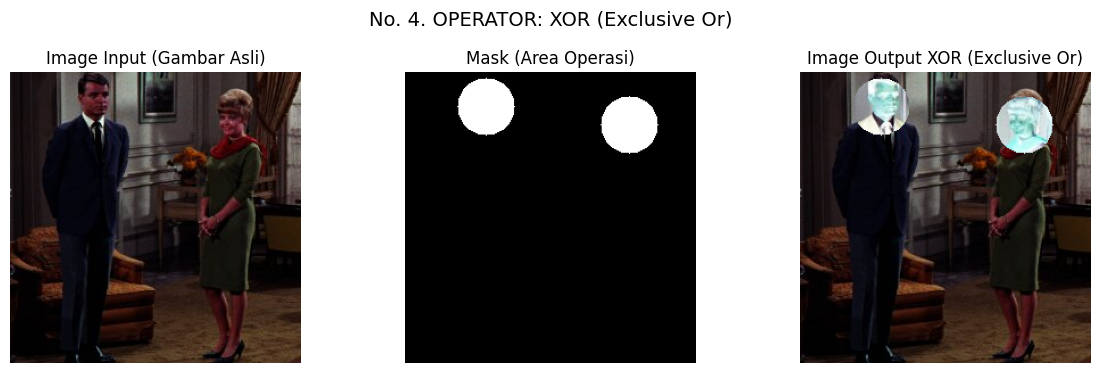

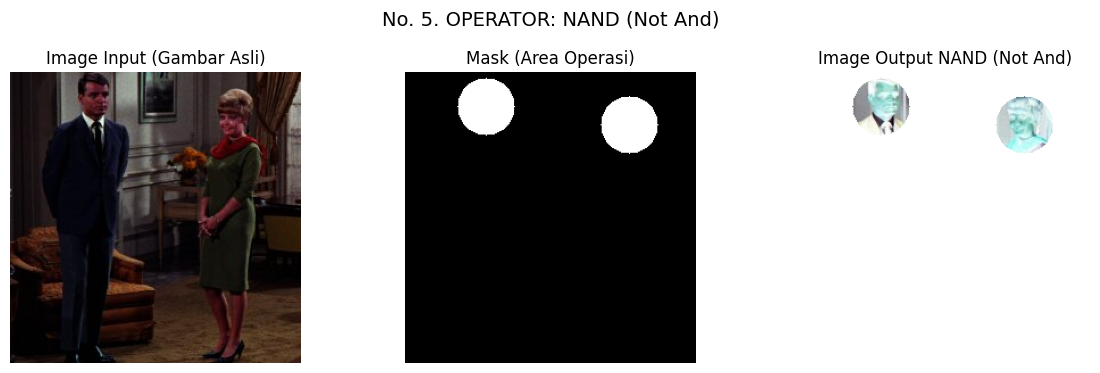

In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

# Path ke gambar asli di dalam Drive
img_path = '/content/drive/MyDrive/PCVK/Images/couple.jpg'
img_a = cv.imread(img_path)

# Pengecekan untuk memastikan gambar berhasil dimuat
if img_a is None:
    print(f"ERROR: Gagal memuat gambar dari path: {img_path}")
    print("Pastikan path sudah benar!")
else:
    # --- Persiapan Gambar dan Mask ---
    img_a_rgb = cv.cvtColor(img_a, cv.COLOR_BGR2RGB)

    # Membuat mask (Image Input B) menggunakan parameter Anda
    mask_b = np.zeros(img_a.shape[:2], dtype="uint8")
    height, width = img_a.shape[:2]

    center_kiri = (int(width * 0.28), int(height * 0.12))
    center_kanan = (int(width * 0.77), int(height * 0.18))
    radius = int(height * 0.10)

    cv.circle(mask_b, center_kiri, radius, 255, -1)
    cv.circle(mask_b, center_kanan, radius, 255, -1)

    # --- Hitung semua hasil operator dengan logika yang sudah diperbaiki ---

    # Konversi mask menjadi 3-channel agar bisa dioperasikan dengan gambar berwarna
    mask_b_3channel = cv.cvtColor(mask_b, cv.COLOR_GRAY2BGR)

    # 1. NOT: Diterapkan pada gambar asli (sesuai contoh modul)
    output_not = cv.bitwise_not(img_a_rgb)

    # 2. OR: Antara gambar asli dan mask (menghasilkan efek tempelan)
    output_or = cv.bitwise_or(img_a_rgb, mask_b_3channel)

    # 3. AND: Menggunakan mask untuk memotong gambar (cutout)
    output_and = cv.bitwise_and(img_a_rgb, img_a_rgb, mask=mask_b)

    # 4. XOR: Antara gambar asli dan mask (menghasilkan efek negatif di dalam mask)
    output_xor = cv.bitwise_xor(img_a_rgb, mask_b_3channel)

    # 5. NAND: Kebalikan dari hasil AND
    output_nand = cv.bitwise_not(output_and)

    # --- Siapkan daftar untuk looping plot ---
    operator_list = [
        ("NOT (Komplemen)", output_not),
        ("OR (Atau)", output_or),
        ("AND (Dan)", output_and),
        ("XOR (Exclusive Or)", output_xor),
        ("NAND (Not And)", output_nand)
    ]

    # --- Loop untuk membuat 5 plot terpisah ---
    print("\nMenampilkan hasil untuk setiap operator logika...")
    for i, (title, result_img) in enumerate(operator_list):

        # Buat figure baru untuk setiap operator
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        fig.suptitle(f"No. {i+1}. OPERATOR: {title}", fontsize=14, y=0.92)

        # Kolom 1: Gambar Input (selalu sama)
        axes[0].imshow(img_a_rgb)
        axes[0].set_title("Image Input (Gambar Asli)")
        axes[0].axis('off')

        # Kolom 2: Mask (selalu sama)
        axes[1].imshow(mask_b, cmap='gray')
        axes[1].set_title("Mask (Area Operasi)")
        axes[1].axis('off')

        # Kolom 3: Image Output (berubah sesuai operator)
        axes[2].imshow(result_img)
        axes[2].set_title(f"Image Output {title}")
        axes[2].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()
        print("=" * 90)

**HASIL ANALISA**

Berdarakn output yang dikeluarkan di berbagai macam operator logika, yaitu :
1. Operator NOT (Komplemen)

    Operator NOT bekerja dengan membalik nilai setiap piksel pada gambar. Untuk gambar berwarna 8-bit, setiap komponen warna (R, G, B) dengan nilai P akan diubah menjadi 255 - P. Hal ini menyebabkan area terang menjadi gelap, area gelap menjadi terang, dan setiap warna berubah menjadi warna komplementernya (misalnya merah menjadi sian). Hasilnya adalah citra negatif dari gambar asli.

2. Operator OR (Atau)

    Operator OR menghasilkan piksel yang aktif jika piksel di gambar asli ATAU piksel di mask aktif. Karena lingkaran pada mask berwarna putih solid (nilai 255), maka setiap piksel gambar asli yang dioperasikan dengan area ini akan menghasilkan nilai 255 (putih). Inilah mengapa hasilnya terlihat seperti gambar asli yang "ditempeli" dua lingkaran putih solid. Area di luar lingkaran tidak berubah karena dioperasikan dengan warna hitam (nilai 0).

3. Operator AND (Dan)

    Operator AND hanya menghasilkan piksel yang aktif jika piksel di gambar asli DAN di mask sama-sama aktif. Dalam praktiknya, ini berarti hanya piksel dari gambar asli yang posisinya berada di dalam area putih pada mask yang akan dipertahankan. Area di luar lingkaran pada mask berwarna hitam, sehingga hasilnya juga menjadi hitam. Efek inilah yang membuatnya sempurna untuk proses masking atau membuat "potongan" gambar.

4. Operator NAND (Not And)

    NAND adalah kebalikan dari operasi AND. Hasilnya adalah citra negatif dari keluaran AND. Area yang tadinya merupakan potongan gambar (hasil AND) akan dibalik warnanya menjadi negatif. Sementara itu, area latar belakang yang tadinya hitam (nilai 0) akan menjadi putih (nilai 255).

5. Operator XOR (Exclusive Or)

    Operator XOR menghasilkan piksel yang aktif jika piksel aktif di salah satu dari dua gambar, TAPI TIDAK di keduanya.
    
    - Di luar lingkaran: Piksel gambar asli dioperasikan dengan piksel hitam (nilai 0) dari mask. Karena hanya satu yang aktif, piksel gambar asli dipertahankan.
    - Di dalam lingkaran: Piksel gambar asli dioperasikan dengan piksel putih (nilai 255) dari mask. Operasi Piksel XOR 255 akan menghasilkan 255 - Piksel, yang merupakan kebalikan (negatif) dari warna piksel tersebut. Inilah mengapa hasilnya adalah gambar asli dengan warna terbalik di dalam area lingkaran.